In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

# EDA

In [2]:
os.chdir('/Users/soheepark/03-GEO근감소/')
df1 = pd.read_csv('./GSE167186_eda.csv', index_col=0)
df2 = pd.read_csv('./GSE111016_eda.csv', index_col=0)

In [3]:
df1.head()

,group,tissue,age,6 min walk test (m/s),biodex (kg),time up and go (s),sppb,grip strength (kg),leg press (kg)
X_10,Sarcopenia,Skeletal muscle,68.0,1.010101,166.20,7.15,12.0,41.8,130.50
X_11,Old Healthy,Skeletal muscle,87.0,1.088929,136.40,7.82,11.0,24.2,129.55
X_13,Sarcopenia,Skeletal muscle,83.0,1.425178,143.10,7.97,10.0,40.0,127.27
X_14,Old Healthy,Skeletal muscle,77.0,0.918836,222.10,6.56,11.0,35.5,229.50
X_15,Old Healthy,Skeletal muscle,82.0,127.900000,7.16,12.00,35.1,94.5,NaN


In [4]:
df2.head()

,population,sarcopenia status,Sex,age (yr),tissue
Sample 1 [sss],Chinese descent,no,male,69,vastus lateralis muscle
Sample 2 [sss],Chinese descent,no,male,69,vastus lateralis muscle
Sample 3 [sss],Chinese descent,yes,male,69,vastus lateralis muscle
Sample 4 [sss],Chinese descent,yes,male,73,vastus lateralis muscle
Sample 5 [sss],Chinese descent,no,male,71,vastus lateralis muscle


# 단변량 데이터 탐색

## 범주형 변수
- Series.describe()
- Series.value_counts()
- Pie plot
- Bar plot

In [66]:
def Categorical_visualization(variables, DataFrame):
    for variable in variables:
        dict = {}
        key = variable
        value = DataFrame[variable].value_counts().reset_index()
        dict[key] = value
    
        temp = pd.DataFrame(dict[variable])
        
        sns.barplot(x='index', y=variable, data=temp, width=0.4)
        plt.title(f'Counts by {variable}')
        plt.xlabel(variable)
        plt.ylabel('count')
        plt.show()

        plt.pie(temp[variable], labels=temp['index'], autopct='%.1f%%')
        plt.show()

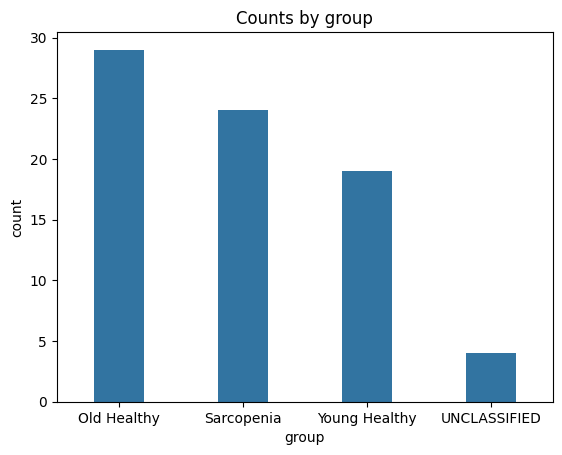

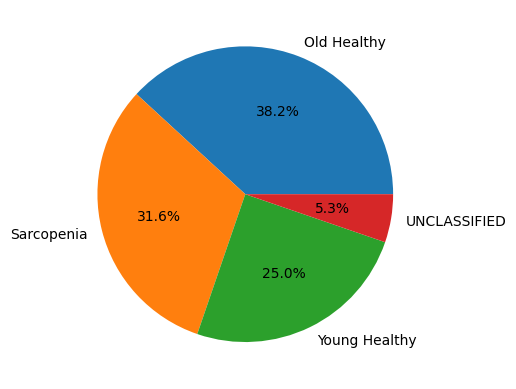

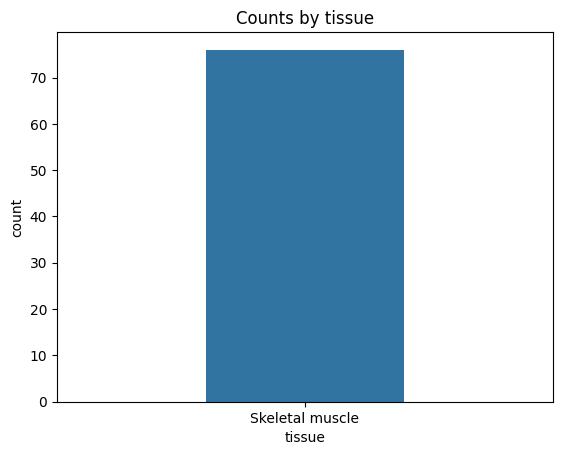

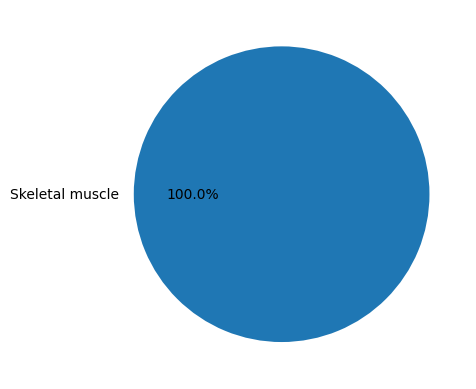

In [68]:
cat1 = ['group', 'tissue']
Categorical_visualization(cat1, df1)

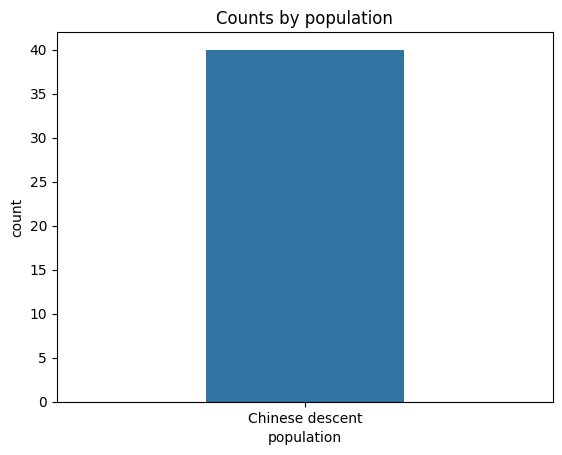

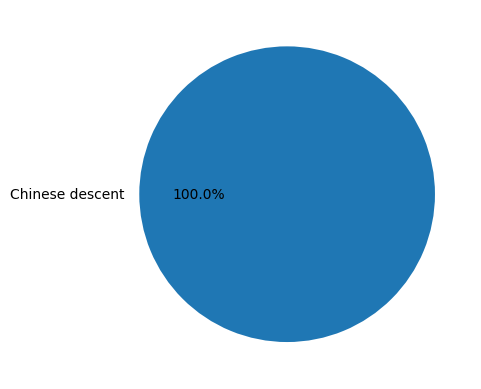

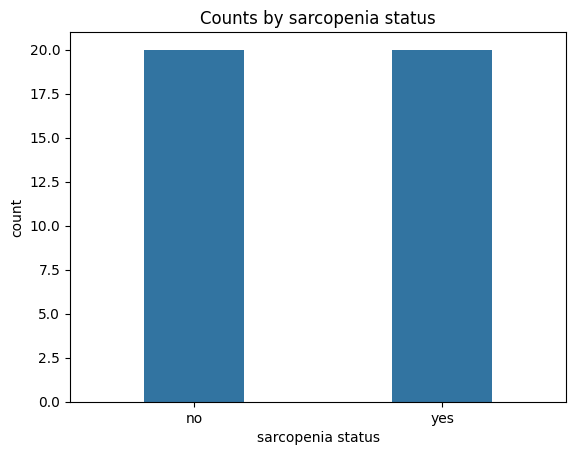

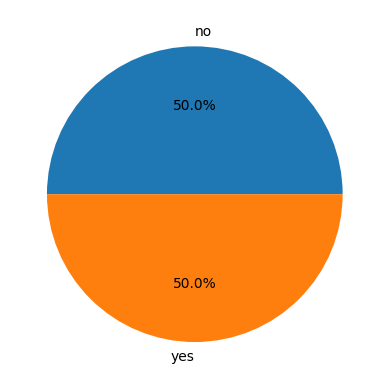

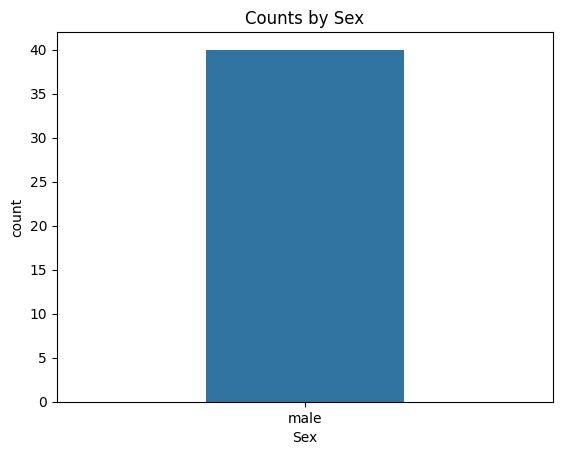

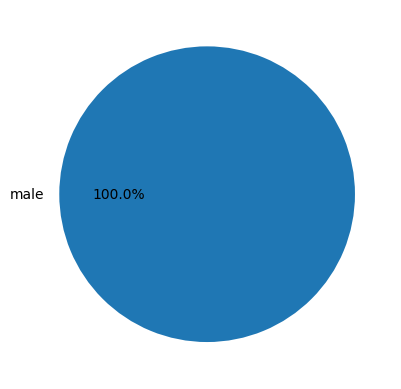

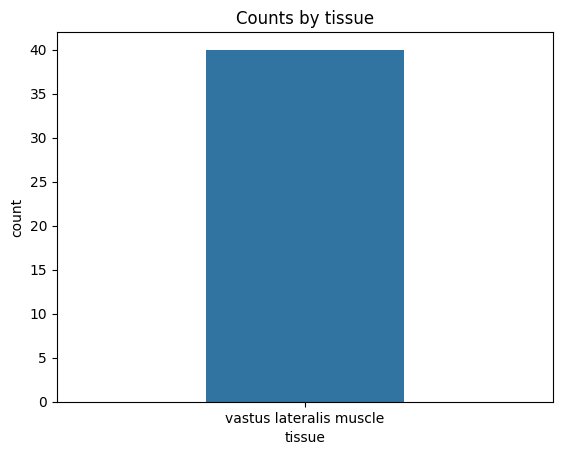

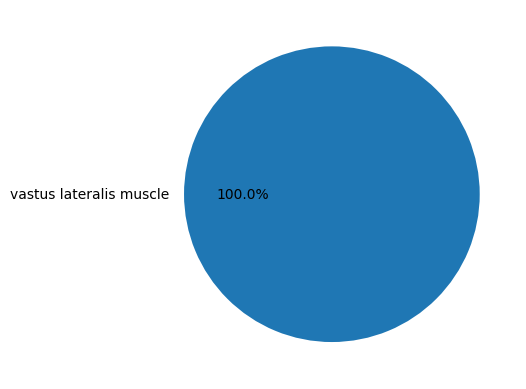

In [69]:
cat2 = ['population', 'sarcopenia status', 'Sex', 'tissue']
Categorical_visualization(cat2, df2)

## 수치형 변수
- Series.describe()
- Hitogram
- KDE plot
- Boxplot

In [70]:
def Numeric_visualization(variables, DataFrame):
    for variable in variables:
        dict = {}
        key = variable
        value = DataFrame[variable]
        dict[key] = value
        
        temp = pd.DataFrame(dict[variable])

        # histogram
        sns.histplot(x=variable, data=temp)
        plt.title(f'{variable}')
        plt.xlabel(variable)
        plt.ylabel('count')
        plt.show()
        
        # kernel density estimate (KDE) plot
        sns.kdeplot(x=variable, data=temp)
        plt.title(f'{variable}')
        plt.xlabel(variable)
        plt.ylabel('count')
        plt.show()
        
        # violinplot
        sns.violinplot(x=variable, data=temp)
        sns.stripplot(x=variable, data=temp, jitter=True, alpha=0.6)
        plt.title(f'{variable}')
        plt.xlabel(variable)
        plt.ylabel('count')
        plt.show()

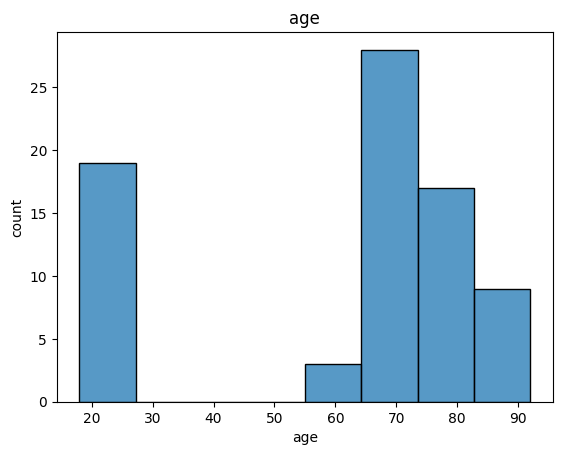

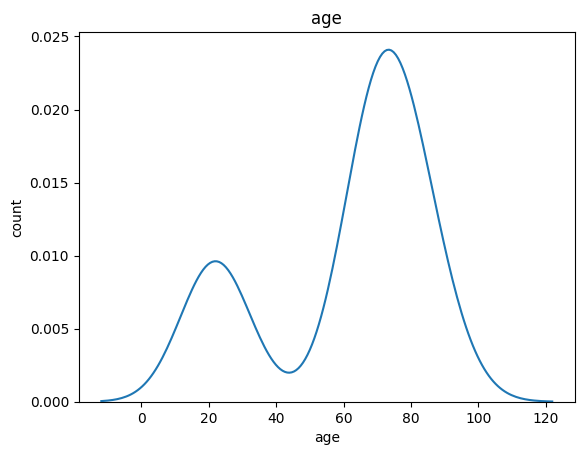

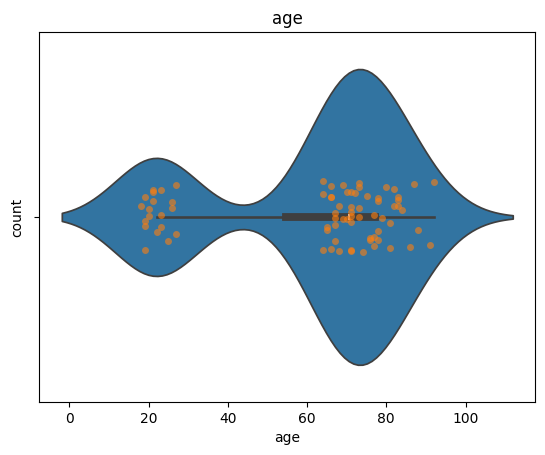

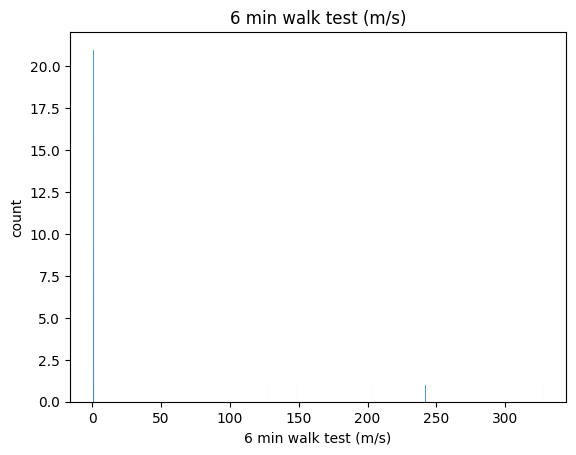

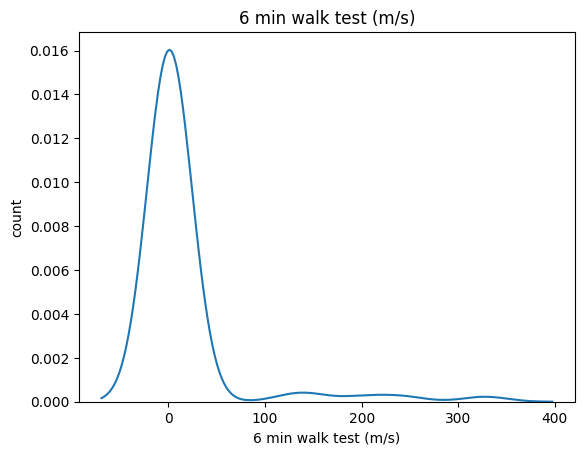

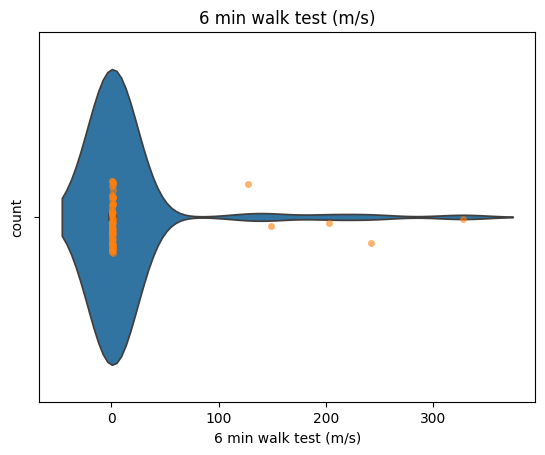

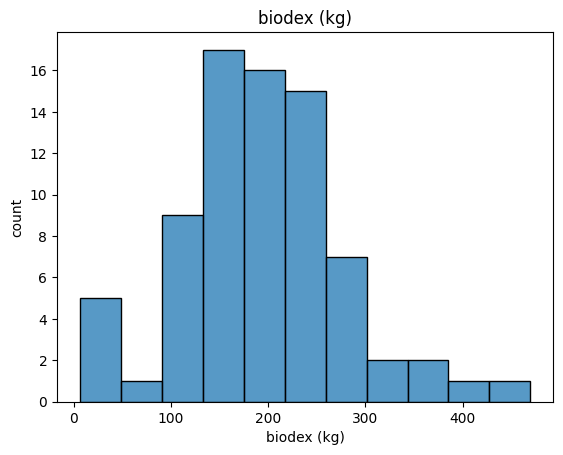

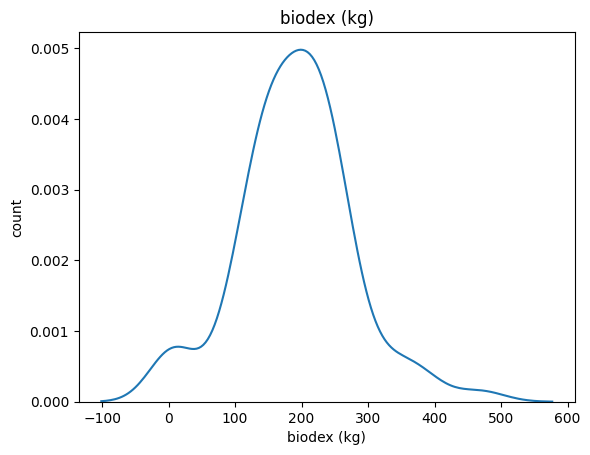

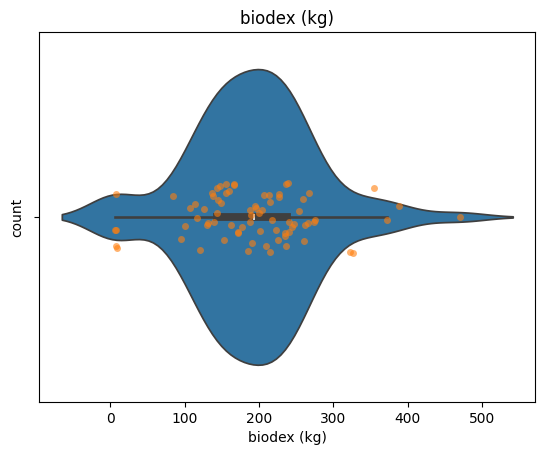

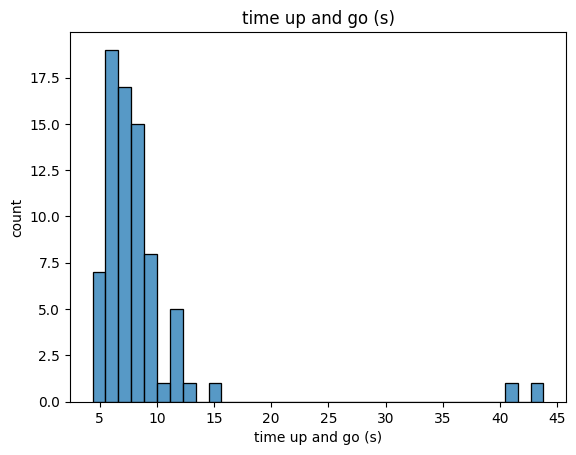

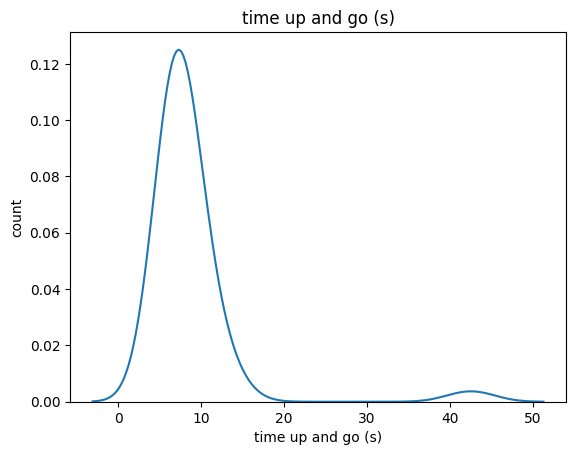

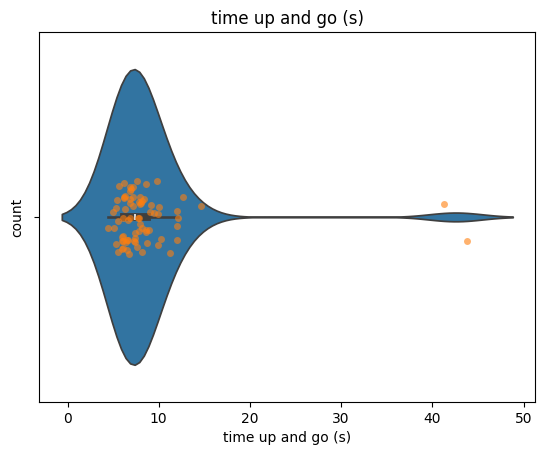

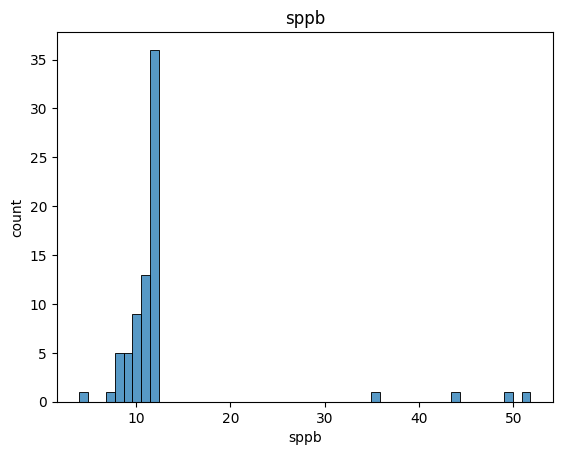

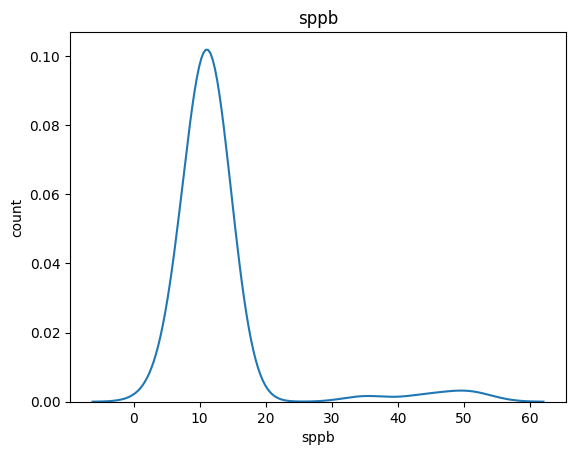

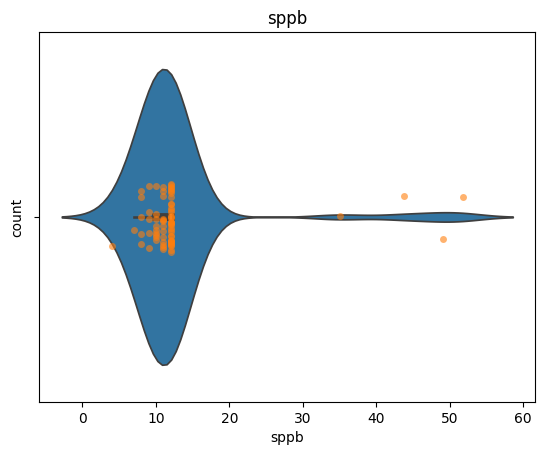

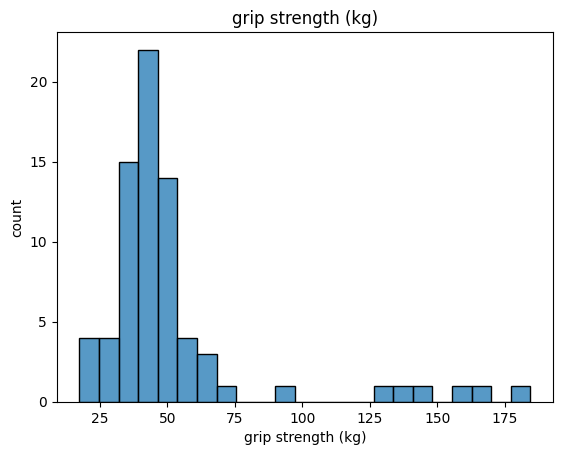

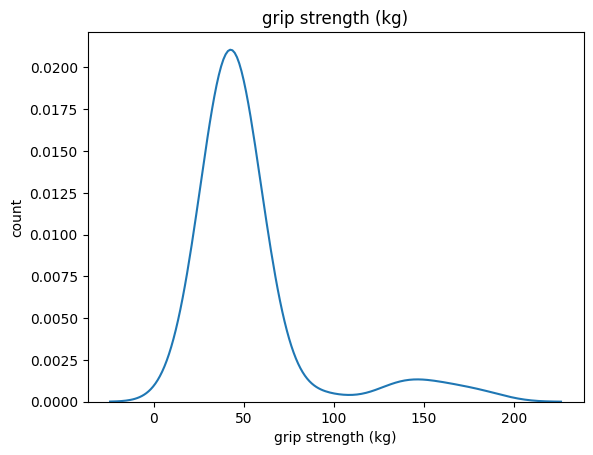

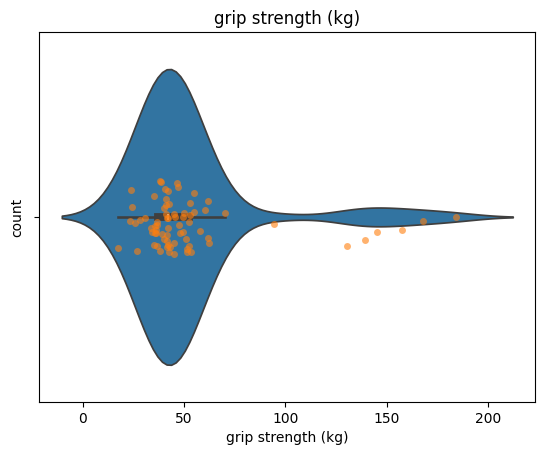

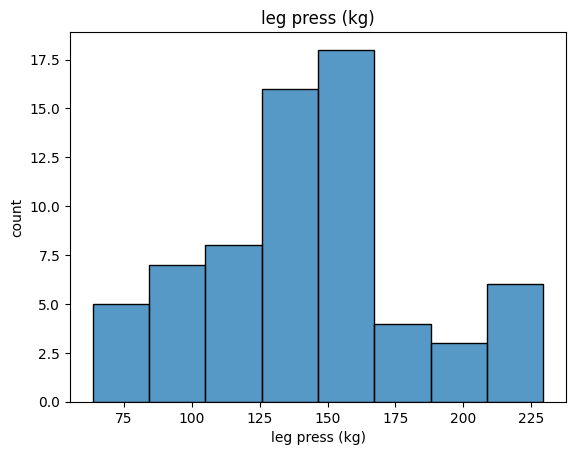

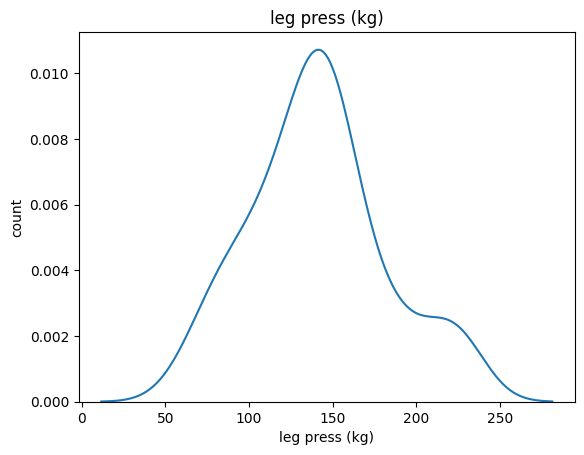

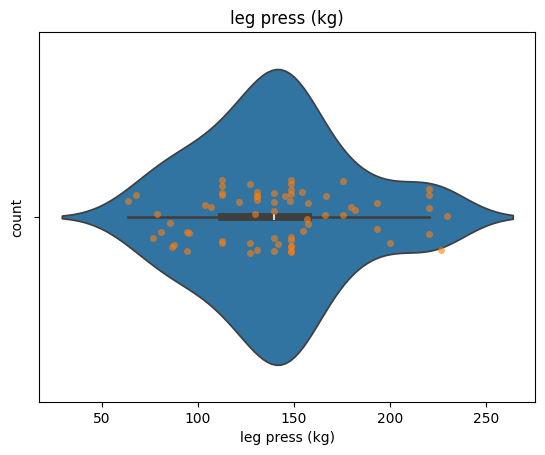

In [71]:
numerical_cols1 = df1.describe().columns
Numeric_visualization(numerical_cols1, df1)

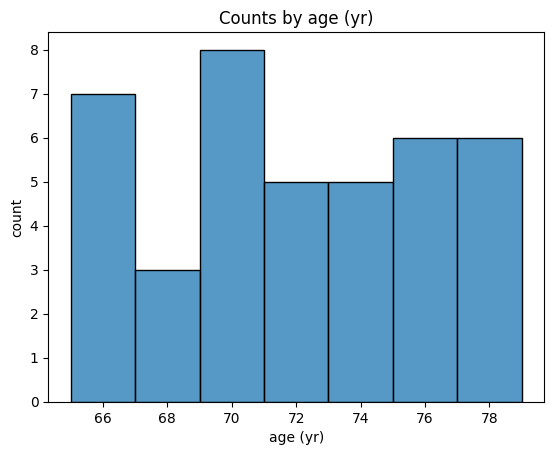

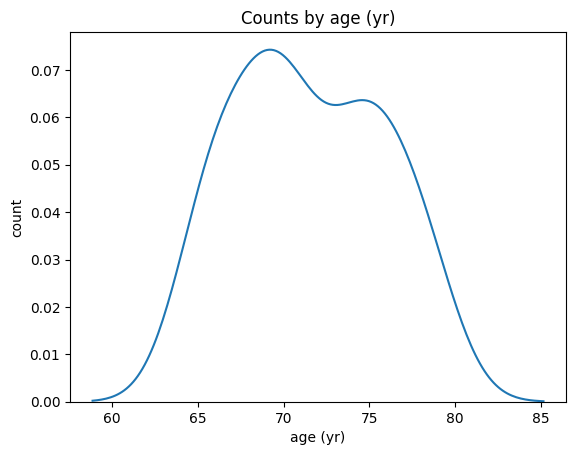

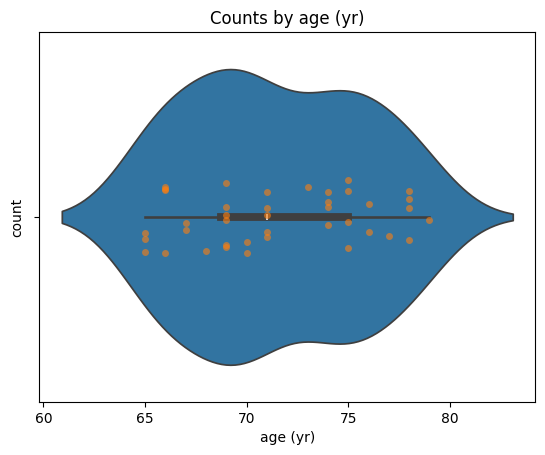

In [46]:
numerical_cols2 = df2.describe().columns
Numeric_visualization(numerical_cols2, df2)

# 다변량 데이터 탐색

In [ ]:
# 수치형
numerical_cols1 = df1.describe().columns
Numeric_visualization(numerical_cols1, df1)
numerical_cols2 = df2.describe().columns
Numeric_visualization(numerical_cols2, df2)

# 범주형
cat1 = ['group', 'tissue']
Categorical_visualization(cat1, df1)
cat2 = ['population', 'sarcopenia status', 'Sex', 'tissue']
Categorical_visualization(cat2, df2)

## 수치형 변수 한 번에 탐색

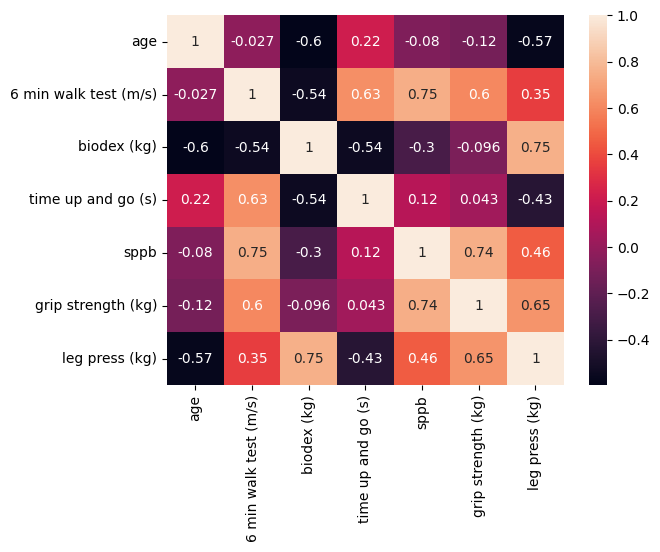

In [74]:
numerical_cols1 = df1.describe().columns
df_corr = df1[numerical_cols1].corr()

sns.heatmap(df_corr, annot=True)
plt.show()

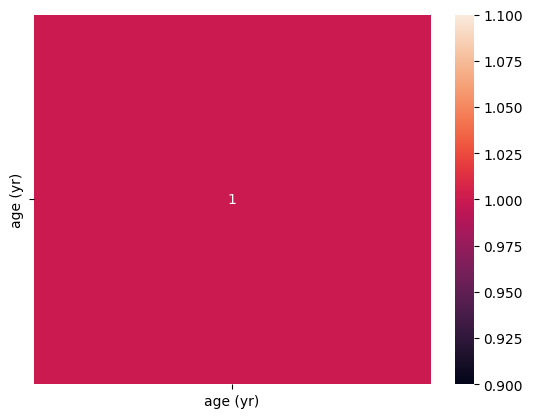

In [75]:
numerical_cols2 = df2.describe().columns
df_corr = df2[numerical_cols2].corr()

sns.heatmap(df_corr, annot=True)
plt.show()

## 수치형 변수 2개 

In [ ]:
sns.scatterplot(x='age', y='target', data=df)
plt.show()

## 수치형 변수 1개, 범주형 변수 1개
sns.boxplot(x='sex', y='target', data=df)  
plt.show()

sns.violinplot(x='sex', y='target', data=df)  
plt.show()

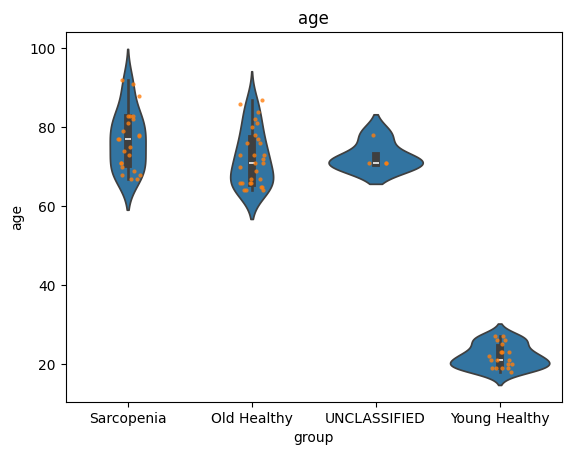

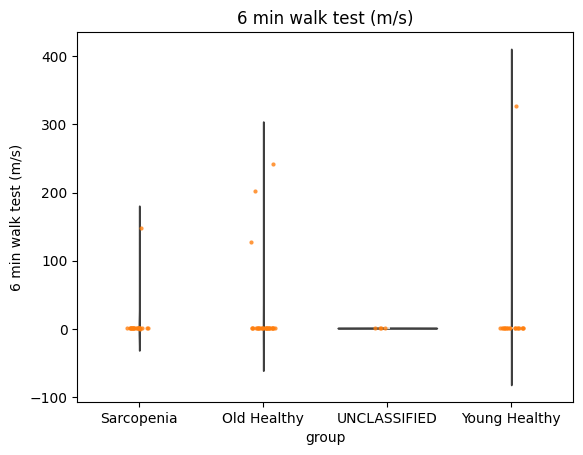

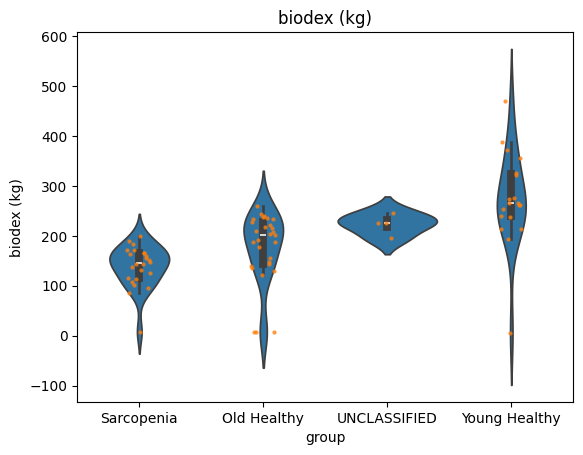

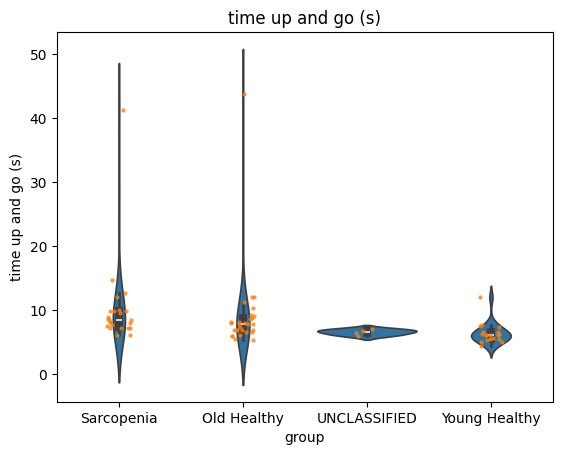

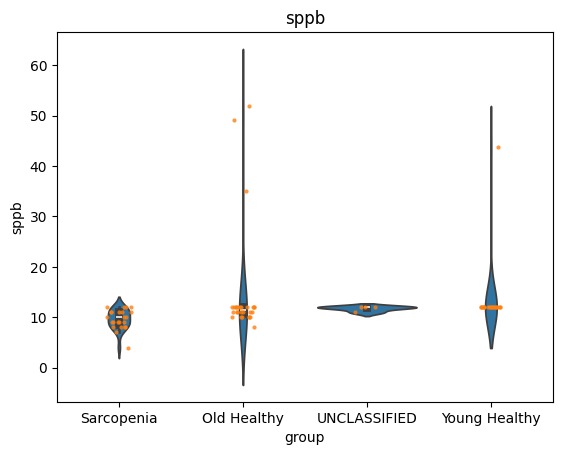

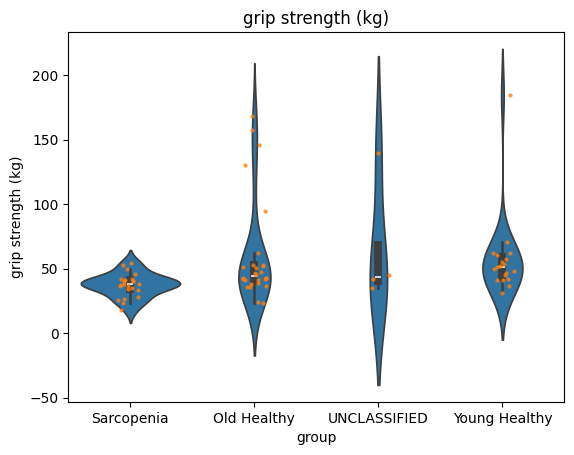

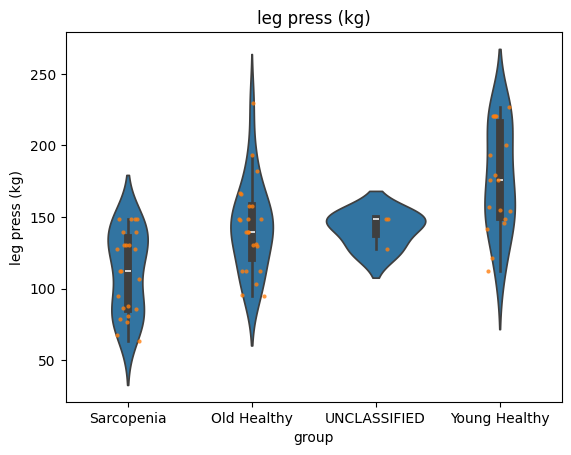

In [93]:
for variable in numerical_cols1:
    sns.violinplot(x='group', y=variable, data=df1)
    sns.stripplot(x="group", y=variable, data=df1, jitter=True, alpha=0.8, size=3)
    plt.title(f'{variable}')
    plt.xlabel('group')
    plt.ylabel(variable)
    plt.show()

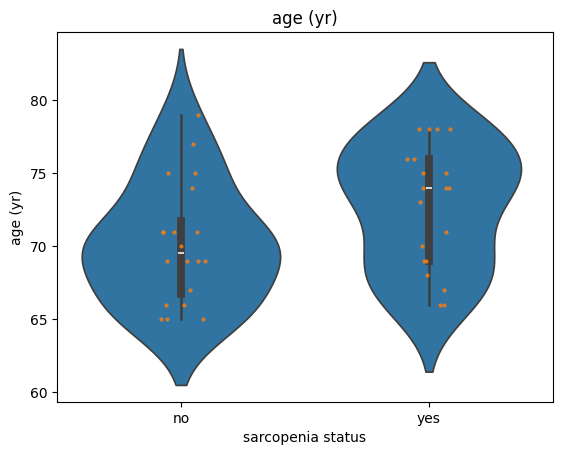

In [99]:
for variable in numerical_cols2:
    sns.violinplot(x='sarcopenia status', y=variable, data=df2)
    sns.stripplot(x="sarcopenia status", y=variable, data=df2, jitter=True, alpha=0.8, size=3)
    plt.title(f'{variable}')
    plt.xlabel('sarcopenia status')
    plt.ylabel(variable)
    plt.show()

## 범주형 변수 2개

In [ ]:
temp = df.groupby(by=['Group', 'sex'])['age'].count().reset_index()
temp

In [ ]:
sns.barplot(x='Group', y='age', hue='sex', data=temp)